In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, sin
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

%matplotlib inline

# Ex 1

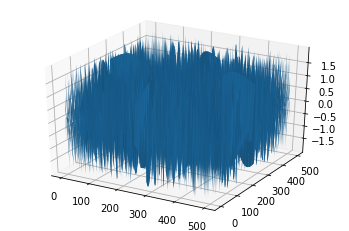

In [2]:
from pylab import imshow, show, colorbar
fig = plt.figure()
ax = plt.axes(projection='3d')

start=0
stop = 500
resolution = 200

k1, k2 = 5, 5
a1, a2 = 1, 1

def onda(x, y, x0, y0, a, k):
    r = sqrt((x-x0)**2 + (y-y0)**2)
    return a*sin(k*r)


x = np.linspace(start, stop, num=resolution)
y = np.linspace(start, stop, num=resolution)

x, y = np.meshgrid(x, y)


ax.plot_surface(x, y, onda(x,y, 240, 250, a1, k1)+ onda(x,y, 260, 250, a1, k1))

#ax.plot_surface(x, y, onda(x,y, 260, 250, a1, k1))

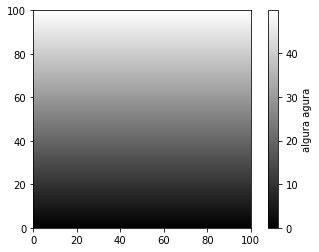

In [3]:
from math import sqrt, sin, pi 
from numpy import empty 
from pylab import imshow, gray, show, colorbar

side = 100
points = 500
spacing = side/points
xi = empty([points, points], float)

for i in range(points):
    y = spacing*i
    for j in range(points):
        x = spacing*j
        xi[i, j] = 0.1*i


plot = imshow(xi, origin="lower", extent=[0, side, 0, side])
cb = colorbar(plot)
cb.set_label("algura agura")
gray()
show()

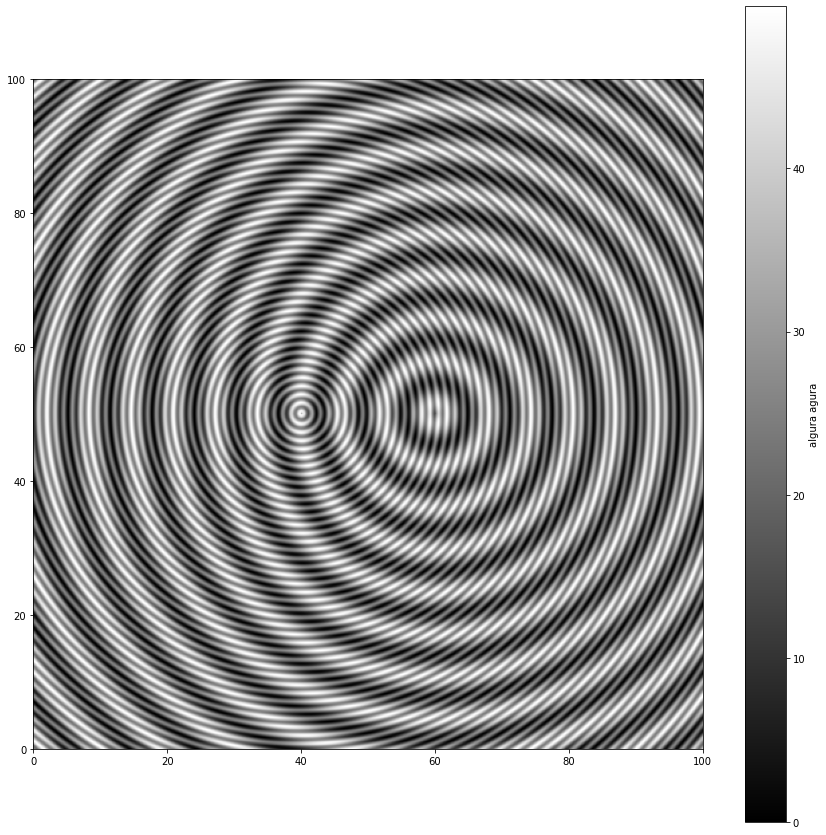

In [4]:
from math import sqrt, sin, pi 
from numpy import empty 
from pylab import imshow, gray, show, colorbar

side = 100
points = 500
spacing = side/points
xi = empty([points, points], float)

k1, k2 = 5, 1
a1, a2 = 1, 1

def onda(x, y, x0, y0, a, k):
    r = sqrt((x-x0)**2 + (y-y0)**2)
    return a*sin(k*r)

for i in range(points):
    y = spacing*i
    for j in range(points):
        x = spacing*j
        xi[i, j] = onda(x,y, 40, 50, a1, k1)+onda(x,y, 60, 50, a2, k2)

fig, ax = plt.subplots(figsize=(15, 15))


ax.imshow(xi, origin="lower", extent=[0, side, 0, side])
cb = colorbar(plot)
cb.set_label("algura agura")
gray()
show()

# Ex 2

## Exploring logistic map

In [5]:
def logistic_map_aux(x, r):
    return r*x*(1-x)


In [6]:
def iteractive_plot( r):
    fig, ax = plt.subplots(figsize=(10,7))

    # Get the values of our function and plot it
    x = np.linspace(0, 1, 100)
    y = [logistic_map_aux(i, r) for i in x]
    ax.plot(x, y)
    ax.set_ylabel('$Population_{n+1}$')
    ax.set_xlabel('$Population_{n}$')

    fig.tight_layout()
    #plt.legend()
    plt.show()
    return()

    
interact(iteractive_plot,r=(0,5,0.1))

interactive(children=(FloatSlider(value=2.0, description='r', max=5.0), Output()), _dom_classes=('widget-inter…

<function __main__.iteractive_plot(r)>

## Population over time

In [7]:

def iteractive_plot(x0, r):
    fig, ax = plt.subplots(figsize=(10,7))

    # Get the values of our function and plot it
    x = np.linspace(0, 50, 50)
    y = []
    previous = x0
    for i in x:
        actual = logistic_map_aux(previous, r)
        y.append(actual)
        previous = actual

    ax.plot(x, y, color='c')
    ax.plot(x, y, 'co')

    ax.set_ylabel('Population')
    ax.set_xlabel('Time')

    fig.tight_layout()
    #plt.legend()
    plt.show()
    return()

    
interact(iteractive_plot, x0=(0,1,0.1), r=(0,5,0.1),  resolution=(1,200,10))

interactive(children=(FloatSlider(value=0.0, description='x0', max=1.0), FloatSlider(value=2.0, description='r…

<function __main__.iteractive_plot(x0, r)>

## Ploting the Logistic Map

In [8]:

def logistic_map(x, r, out_len, max_depth):

    for _ in range(max_depth):
        x = r*x*(1-x)

    retorno = []
    for _ in range(out_len):
        x = r*x*(1-x)

        if np.isinf(x):
            return []

        retorno.append(x)

    return retorno


In [9]:
len(set(logistic_map(0.6, 1, 1000, 1000)))

1000

In [10]:
set(logistic_map(0.6, 1, 1000, 1000))

{0.0005226182704546827,
 0.0008347426205315168,
 0.0008749465241386691,
 0.0005505424341381071,
 0.000515077073543152,
 0.0006811165453193335,
 0.0006728616059552621,
 0.0007691977169201966,
 0.0008149972526725418,
 0.0005239882166163752,
 0.0009100111110393974,
 0.0009166908052247279,
 0.000868104652398404,
 0.0006152788971327642,
 0.0006225613338379896,
 0.0006066881513140493,
 0.0006639210881776001,
 0.0005275839285783372,
 0.0009543440909993844,
 0.0007824488745020879,
 0.0005902069933725483,
 0.0007011892692201532,
 0.0005623129155019222,
 0.0006368433960153477,
 0.0006517963520274096,
 0.0005726225449098833,
 0.000564855352458892,
 0.0005703351300550218,
 0.0005412991344560193,
 0.0007445526087117815,
 0.0005508458653054312,
 0.0005940661209340722,
 0.0009320848461627239,
 0.0009158504831923444,
 0.0006210138944071917,
 0.0005346393549645917,
 0.0005340679820449474,
 0.0007733650266033326,
 0.0009700979800211565,
 0.000521527461704565,
 0.0006867333332785478,
 0.00054963414360291

In [11]:
len(set(logistic_map(0.6, 2.8, 1000, 1000)))

1

In [12]:
len(set(logistic_map(0.6, 3.5, 1000, 1000)))

4

In [13]:
len(set(logistic_map(0.6, 3.6, 1000, 1000)))

1000

KeyboardInterrupt: 

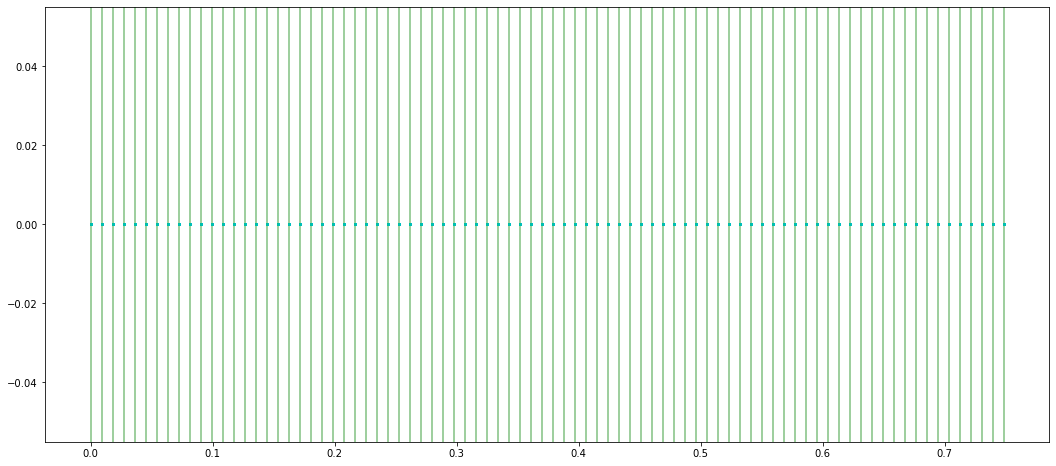

In [14]:
fig, ax = plt.subplots(figsize=(18,8))
x0 = 0.6
# Get the values of our function and plot it
r = np.linspace(0, 4.5, 500)
out_len = 1000
for i in r:
    values = logistic_map(x0, i, out_len=out_len, max_depth=100000)

    valores_converge = len(set([round(x, 10) for x in values]))

    # Não converge
    if valores_converge == out_len and values != []:
        plt.axvline(x=i, color='pink', alpha=0.5)

    # Converge para 1
    elif valores_converge == 1:
        plt.axvline(x=i, color='g', alpha=0.5)

    # Co
    else:
        plt.axvline(x=i, color='y', alpha=0.5)

    
    if values == []: # or np.isinf(values).any()
        plt.axvline(x=i, color='r', alpha=0.5)

    # Plot func
    plt.plot([i for _ in range(len(values))], values, 'co', markersize=1, alpha=0.1)



ax.set_xlabel('r')
ax.set_ylabel('Logistic Map')

fig.tight_layout()
plt.grid()
#plt.legend()
plt.show()

In [ ]:
def iteractive_plot( r):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = plt.axes(projection='3d')

  x = np.linspace(0, 1, 100)
  y = np.linspace(0, 1, 100)
  

  x, y = np.meshgrid(x, y)
  y = logistic_map_aux(y,r*np.ones(y.shape))
  z = logistic_map_aux(y,r*np.ones(y.shape))


  ax.plot_surface(x, y, z, linewidth=0, antialiased=False)


  ax.set_ylabel('$Population_{n+1}$')
  ax.set_xlabel('$Population_{n}$')
  ax.set_zlabel('$Population_{n+2}$')

  fig.tight_layout()
  plt.show()
  return()

    
interact(iteractive_plot,r=(0,5,0.1))
  


interactive(children=(FloatSlider(value=2.0, description='r', max=5.0), Output()), _dom_classes=('widget-inter…

<function __main__.iteractive_plot(r)>

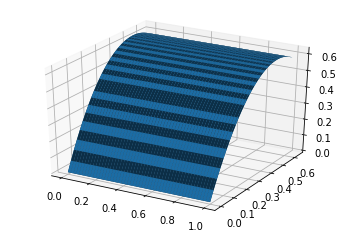

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')
r = 2.5

x = np.linspace(0, 1, 100)
y = [logistic_map_aux(i, r) for i in x]

x, y = np.meshgrid(x, y)
z = logistic_map_aux(y,r*np.ones(y.shape))


ax.plot_surface(x, y, logistic_map_aux(y,r*np.ones(y.shape)))


In [ ]:

ax.plot_surface(x, y, logistic_map_aux(y,r*np.ones(y.shape)))

In [ ]:
logistic_map_aux(y,r*np.ones(y.shape)).shape

(100, 100)

In [ ]:
y.shape

(100, 100)

TypeError: len() of unsized object

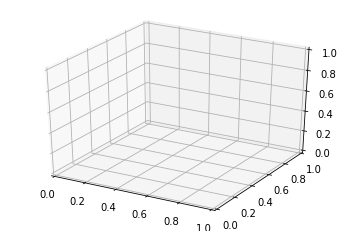

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.linspace(0, 1, 100)
y = [logistic_map_aux(i, r) for i in x]

x, y = np.meshgrid(x, y)


ax.plot_surface(x,y, logistic_map_aux(y,r*np.ones(y.shape)),'co')

ax.set_ylabel('$Population_{n+1}$')
ax.set_xlabel('$Population_{n}$')
ax.set_zlabel('$Population_{n+2}$')


#ax.plot3D(x, y, function(x,y))#
ax.plot_surface(x, y, function(x,y))

## Ex 3

In [ ]:
dados = pd.read_csv("millikan.txt", delimiter=' ')
dados.dtypes

f    float64
V    float64
dtype: object

In [ ]:
dados

,f,V
0,5.487400e+14,0.53090
1,6.931000e+14,1.08420
2,7.430700e+14,1.27340
3,8.219300e+14,1.65980
4,9.607400e+14,2.19856
5,1.184000e+15,3.10891


## Ex 6

## Ex 7

In [3]:
import numpy as np


def invertermat(matrix):
    n = matrix.shape[0]
    inverted = np.identity(n)


      # N será o tamanho da matriz
    n = matrix.shape[0]

    ## Colocar o triangulo inferior a 0's
    # Para cada linha da matriz..
    for line in range(n):
        # Dividir a linha pelo seu pivot 
        # de modo a ter a diagonal = 1
        pivot = matrix[line][line]
        matrix[line] = matrix[line]/pivot
        inverted[line] =  inverted[line]/pivot

        # Para cada uma das linhas por baixo
        # do pivot, vamos subtrair à linha
        # a linha do nosso pivot * uma constante, 
        # de modo a que, na coluna do pivot, por baixo deste
        # apenas haja zeros
        for other_line in range(n-line-1):
            # Queremos que no lugar do 'pivot_atual' seja 0
            pivot_atual = matrix[other_line+line+1][line]
            matrix[other_line+line+1] = matrix[other_line+line+1] - (pivot_atual/1) * matrix[line]
            inverted[other_line+line+1] = inverted[other_line+line+1] - (pivot_atual/1) * inverted[line]


    ## Colocar o triangulo superior a 0's
    # Agora vamos começar de baixo para cima ou seja,
    # para cada linha a cima de cada pivot (o 1 na diagonal)
    # vamos subtrair a linha atual * uma constante de modo a que
    # em cima de cada 1 na diagonal, haja só 0's
    for line in range(1, n, 1):
        for other_line in range(1, n-line+1, 1):
            # Queremos que no lugar do 'pivot_atual' seja 0
            pivot_atual =  matrix[-other_line-line][-line]
            matrix[-other_line-line] = matrix[-other_line-line] - (pivot_atual) * matrix[-line]
            inverted[-other_line-line] = inverted[-other_line-line] - (pivot_atual) * inverted[-line]
        

    
    return inverted


invertermat(np.array([
    [7, 3, -1, 2], 
    [3, 8, 1, 4], 
    [-1, 1, 4, -1], 
    [2, -4, -1, 6]]
, dtype=np.float64))

array([[ 0.18515685, -0.07727621,  0.06579954,  0.00076511],
       [-0.03442999,  0.10941086, -0.05355777, -0.07039021],
       [ 0.0351951 , -0.02295333,  0.27697016,  0.04973221],
       [-0.07880643,  0.09487376, -0.01147666,  0.12777353]])

## Ex 8

In [6]:
import numpy as np

In [7]:
# We want at diagonal the biggest elements possible so that we avoid possible numerical errors

In [8]:
def biggest_number_on_diagonal(matrix, results):
    biggest_numbers_idxs = []
    for line in abs(matrix.T):
        biggest_numbers_idxs.append(list(np.argwhere(line == np.amax(line)).reshape(-1)))

    new_matrix = np.ones(matrix.shape)
    new_results = np.ones(results.shape)
    lines_avail = [] # Lines still available on new_matrix
    idx_used = []
    for i, idxs in enumerate(biggest_numbers_idxs):
        idx = [idx for idx in idxs if idx not in idx_used]
        if idx != []:
            idx = idx[0]
            new_matrix[i] = matrix[idx]
            new_results[i] = results[idx]
            idx_used.append(idx)
        else:
            lines_avail.append(i)
            
    # Possible idxs on the original matrix to put on the new_matrix
    possible_idxs = list(set([i for i in range(matrix.shape[0])]) - set(idx_used))
    assert len(possible_idxs) == len(lines_avail), "error"
    for i, idx_available in enumerate(lines_avail):
        new_matrix[idx_available] = matrix[possible_idxs[i]]
        new_results[idx_available] = results[possible_idxs[i]]

    print("Original Matrix:\n", matrix, results)
    print("New Matrix:\n", new_matrix, new_results)

    return new_matrix, new_results

In [ ]:
def get_big_num_idxs(matrix):
    return [list(np.argwhere(line == np.amax(line)).reshape(-1)) for line in abs(matrix.T)]

def biggest_number_on_diagonal(original_matrix, results):



    new_matrix = np.ones(original_matrix.shape)
    new_results = np.ones(results.shape)

    lines_avail = [i for i in range(original_matrix.shape[0])] # Lines still available on new_matrix
    idx_used = []

    while lines_avail != []:
        biggest_numbers_idxs = get_big_num_idxs(original_matrix)

        for i, idxs in enumerate(biggest_numbers_idxs):
            idx = [idx for idx in idxs if idx not in idx_used]
            if idx != []:
                idx = idx[0]
                new_matrix[i] = original_matrix[idx]
                new_results[i] = results[idx]
                idx_used.append(idx)
                lines_avail.remove(i)
                original_matrix[idx] *= 0
    
    print("Original Matrix:\n", matrix, results)
    print("New Matrix:\n", new_matrix, new_results)

    return new_matrix, new_results

In [9]:
matrix = np.array([[2,1,-1],[-3,-1,2],[-2,1,2]], dtype=np.float64)
results = np.array([8,-11,-3], dtype=np.float64)

matrix, results = biggest_number_on_diagonal(matrix, results)

Original Matrix:
 [[ 2.  1. -1.]
 [-3. -1.  2.]
 [-2.  1.  2.]] [  8. -11.  -3.]
New Matrix:
 [[-3. -1.  2.]
 [ 2.  1. -1.]
 [-2.  1.  2.]] [-11.   8.  -3.]


In [11]:
n = matrix.shape[0]
## Inferior triangle
for line in range(n):
    # Divide the line by it's pivot
    pivot = matrix[line][line]
    matrix[line] = matrix[line]/pivot
    results[line] =  results[line]/pivot

    for other_line in range(n-line-1):

        # We want to zero it
        other_pivot = matrix[other_line+line+1][line]
        matrix[other_line+line+1] = matrix[other_line+line+1] - (other_pivot/1) * matrix[line]
        results[other_line+line+1] = results[other_line+line+1] - (other_pivot/1) * results[line]
        

## Superior triangle
for line in range(1, n, 1):
    pivot_anterior = matrix[-line][-line]
    # na linha n-1
    for other_line in range(1, n-line+1, 1):
      pivot_atual =  matrix[-other_line-line][-line]
      matrix[-other_line-line] = matrix[-other_line-line] - (pivot_atual/pivot_anterior) * matrix[-line]
      results[-other_line-line] = results[-other_line-line] - (pivot_atual/pivot_anterior) * results[-line]


# check if matrix is now the identify matrix
assert (matrix == np.identity(matrix.shape[0])).all(), "[!] An error occured! Solution is not valid"

print("Results:")
for x in [f"\ta{i} = {results[i]}" for i in range(n)]:
    print(x)

Results:
	a0 = 2.0
	a1 = 3.0
	a2 = -0.9999999999999998
